# Курсовой проект - Омирбекова Дария

In [ ]:
from pymystem3 import Mystem

!pip install pymorphy2
import pymorphy2

In [ ]:
import pandas as pd
import string
import numpy as np
import re
from pymorphy2 import MorphAnalyzer
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка данных из каждого листа в DataFrame
# df1 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Дисциплины')
# df2 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Программы')
# df3 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Разделы')
# df4 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Базисы')
# df5 = pd.read_excel('/content/drive/MyDrive/course_work/2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Результаты')
# df6 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Контроли')
# df7 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Разделы-программы')
# df8 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Разделы-результаты-программы')
# df9 = pd.read_excel('2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Контроли-результаты-программы')


# Объединение DataFrame'ов по строкам (вертикальное объединение)
# merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)
# Добавьте аргумент ignore_index=True, чтобы переиндексировать объединенный DataFrame

# Опционально: сохранение объединенного DataFrame в новый файл
# merged_df.to_excel('Сводная_таблица.xlsx', index=False)


In [ ]:
# Загрузка данных из Excel
df_disciplines = pd.read_excel('/content/drive/MyDrive/course_work/2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Дисциплины')
df_programs = pd.read_excel('/content/drive/MyDrive/course_work/2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Программы')
df_sections = pd.read_excel('/content/drive/MyDrive/course_work/2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Разделы')
df_results = pd.read_excel('/content/drive/MyDrive/course_work/2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Результаты')
df_links = pd.read_excel('/content/drive/MyDrive/course_work/2023-11-16_PlanResReport_2022(5).xlsx', sheet_name='Разделы-результаты-программы')


In [ ]:
# Шаг 1: Разбить "Список ОП" на отдельные строки
df_disciplines_expanded = df_disciplines.assign(
    ОП=df_disciplines['Список ОП'].str.split(';;')
).explode('ОП').reset_index(drop=True)

df_pedagogical = df_disciplines_expanded.loc[df_disciplines_expanded['ОП'] == 'Программная инженерия']

df_pedagogical

,Unnamed: 0,Ключ АСАВ,Курсы,Ключ программы,Департамент,Факультет,Филиал,Название дисциплины,Языки,Список ОП,Уровни образования,Охват,ОП
71,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
502,423,3746843363,[4],920356.0,департамент психологии,факультет социальных наук,Москва,Развитие навыков взаимодействия,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия
577,497,3752916960,NaN,813390.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Анализ и разработка данных,[None],Программная инженерия,-,для своего кампуса,Программная инженерия
578,498,3752920430,NaN,809952.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Веб-программирование,[None],Программная инженерия,-,для своего кампуса,Программная инженерия
674,594,3763547925,NaN,813366.0,Кафедра математики,"Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Философия науки,[None],Программная инженерия,-,NaN,Программная инженерия
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16890,15541,6532409172,[3],988077.0,департамент программной инженерии,факультет компьютерных наук,Москва,Проектирование и разработка смарт-контрактов д...,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
16891,15542,6532409735,[3],988076.0,департамент программной инженерии,факультет компьютерных наук,Москва,Проектирование и разработка децентрализованных...,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
16892,15543,6532410253,[4],988080.0,департамент больших данных и информационного п...,факультет компьютерных наук,Москва,Теория сложности вычислений,['Английский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
16988,15633,6560878817,[3],989039.0,департамент программной инженерии,факультет компьютерных наук,Москва,Принципы статического анализа исходного кода,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия


In [ ]:
# Шаг 2: Объединение таблицы "Дисциплины" с таблицей "Разделы-результаты-программы" по "Ключ программы"
merged_data = df_pedagogical.merge(
    df_links, left_on='Ключ программы', right_on='Ключ программы', how='inner'
)

merged_data

,Unnamed: 0_x,Ключ АСАВ,Курсы,Ключ программы,Департамент,Факультет,Филиал,Название дисциплины,Языки,Список ОП,Уровни образования,Охват,ОП,Unnamed: 0_y,Ключ результата,Ключ раздела
0,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13871,27547,13048
1,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13872,27547,13050
2,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13873,27564,13048
3,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13874,27564,13050
4,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13875,27607,13048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972536,141323,151408
19016,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972537,141323,151404
19017,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972538,141323,151402
19018,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972539,141323,151041


In [ ]:
# Шаг 3: Добавление данных из таблицы "Разделы" по "Ключ раздела"
merged_data = merged_data.merge(
    df_sections, left_on='Ключ раздела', right_on='Ключ раздела'
)

merged_data

,Unnamed: 0_x,Ключ АСАВ,Курсы,Ключ программы,Департамент,Факультет,Филиал,Название дисциплины,Языки,Список ОП,Уровни образования,Охват,ОП,Unnamed: 0_y,Ключ результата,Ключ раздела,Unnamed: 0,Название раздела,Ключ базиса,Описание раздела
0,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13871,27547,13048,11968,Раздел 1. Образовательный процесс в вузе,30367,Тема 1. Особенности учебного процесса в вузе\n...
1,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13872,27547,13050,11969,Раздел 3. Элементы научно-исследовательской ра...,30367,Тема 6. Методы активизации творческого мышлени...
2,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13873,27564,13048,11968,Раздел 1. Образовательный процесс в вузе,30367,Тема 1. Особенности учебного процесса в вузе\n...
3,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13874,27564,13050,11969,Раздел 3. Элементы научно-исследовательской ра...,30367,Тема 6. Методы активизации творческого мышлени...
4,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,13875,27607,13048,11968,Раздел 1. Образовательный процесс в вузе,30367,Тема 1. Особенности учебного процесса в вузе\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972536,141323,151408,140038,"Повторная применяемость, Обратный вызов, Фабрика",66808,Повторная применяемость компонентов без перепи...
19016,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972537,141323,151404,140034,"Интерфейс IEcoUnknown, UGUID",66808,Назначение и методы интерфейса IEcoUnknown. Пр...
19017,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972538,141323,151402,140032,Компоненты и интерфейсы.,66808,Проблематика ПО. Использование Адаптированной ...
19018,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,972539,141323,151041,139690,Введение,66808,Основные понятия ЭВМ и ОС. Термины и определен...


In [ ]:
# Шаг 4: Добавление данных из таблицы "Результаты" по "Ключ результата"
merged_data = merged_data.merge(
    df_results,
    left_on='Ключ результата',
    right_on='Ключ результата',
    how='inner',
    suffixes=('_left', '_right')  # Добавляем суффиксы для предотвращения конфликта
)

merged_data

,Unnamed: 0_x,Ключ АСАВ,Курсы,Ключ программы,Департамент,Факультет,Филиал,Название дисциплины,Языки,Список ОП,...,ОП,Unnamed: 0_y,Ключ результата,Ключ раздела,Unnamed: 0_left,Название раздела,Ключ базиса,Описание раздела,Unnamed: 0_right,Текст результата
0,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,...,Программная инженерия,13871,27547,13048,11968,Раздел 1. Образовательный процесс в вузе,30367,Тема 1. Особенности учебного процесса в вузе\n...,30457,знает методы активизации творческого мышления ...
1,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,...,Программная инженерия,13872,27547,13050,11969,Раздел 3. Элементы научно-исследовательской ра...,30367,Тема 6. Методы активизации творческого мышлени...,30457,знает методы активизации творческого мышления ...
2,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,...,Программная инженерия,13873,27564,13048,11968,Раздел 1. Образовательный процесс в вузе,30367,Тема 1. Особенности учебного процесса в вузе\n...,30473,знает формы контроля и учебной работы в вузе
3,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,...,Программная инженерия,13874,27564,13050,11969,Раздел 3. Элементы научно-исследовательской ра...,30367,Тема 6. Методы активизации творческого мышлени...,30473,знает формы контроля и учебной работы в вузе
4,45,2831080265,"[1, 2, 4]",650466.0,Кафедра информационных технологий в бизнесе,"Факультет экономики, менеджмента и бизнес-инфо...",НИУ ВШЭ - Пермь,Научно-исследовательский семинар,['Русский'],Программная инженерия,...,Программная инженерия,13875,27607,13048,11968,Раздел 1. Образовательный процесс в вузе,30367,Тема 1. Особенности учебного процесса в вузе\n...,30519,умеет разрабатывать программный продукт в соот...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,...,Программная инженерия,972536,141323,151408,140038,"Повторная применяемость, Обратный вызов, Фабрика",66808,Повторная применяемость компонентов без перепи...,141079,Создавать компоненты для решения как системных...
19016,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,...,Программная инженерия,972537,141323,151404,140034,"Интерфейс IEcoUnknown, UGUID",66808,Назначение и методы интерфейса IEcoUnknown. Пр...,141079,Создавать компоненты для решения как системных...
19017,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,...,Программная инженерия,972538,141323,151402,140032,Компоненты и интерфейсы.,66808,Проблематика ПО. Использование Адаптированной ...,141079,Создавать компоненты для решения как системных...
19018,15932,6756790276,[4],989747.0,"Базовая кафедра группы компаний ""MERA""","Факультет информатики, математики и компьютерн...",НИУ ВШЭ - Нижний Новгород,Проектирование операционных систем,['Русский'],Программная инженерия,...,Программная инженерия,972539,141323,15

In [ ]:
# Шаг 5: Выбор необходимых столбцов для финальной таблицы
final_table = merged_data[['ОП', 'Название дисциплины', 'Название раздела', 'Описание раздела', 'Текст результата']]

final_table

,ОП,Название дисциплины,Название раздела,Описание раздела,Текст результата
0,Программная инженерия,Научно-исследовательский семинар,Раздел 1. Образовательный процесс в вузе,Тема 1. Особенности учебного процесса в вузе\n...,знает методы активизации творческого мышления ...
1,Программная инженерия,Научно-исследовательский семинар,Раздел 3. Элементы научно-исследовательской ра...,Тема 6. Методы активизации творческого мышлени...,знает методы активизации творческого мышления ...
2,Программная инженерия,Научно-исследовательский семинар,Раздел 1. Образовательный процесс в вузе,Тема 1. Особенности учебного процесса в вузе\n...,знает формы контроля и учебной работы в вузе
3,Программная инженерия,Научно-исследовательский семинар,Раздел 3. Элементы научно-исследовательской ра...,Тема 6. Методы активизации творческого мышлени...,знает формы контроля и учебной работы в вузе
4,Программная инженерия,Научно-исследовательский семинар,Раздел 1. Образовательный процесс в вузе,Тема 1. Особенности учебного процесса в вузе\n...,умеет разрабатывать программный продукт в соот...
...,...,...,...,...,...
19015,Программная инженерия,Проектирование операционных систем,"Повторная применяемость, Обратный вызов, Фабрика",Повторная применяемость компонентов без перепи...,Создавать компоненты для решения как системных...
19016,Программная инженерия,Проектирование операционных систем,"Интерфейс IEcoUnknown, UGUID",Назначение и методы интерфейса IEcoUnknown. Пр...,Создавать компоненты для решения как системных...
19017,Программная инженерия,Проектирование операционных систем,Компоненты и интерфейсы.,Проблематика ПО. Использование Адаптированной ...,Создавать компоненты для решения как системных...
19018,Программная инженерия,Проектирование операционных систем,Введение,Основные понятия ЭВМ и ОС. Термины и определен...,Создавать компоненты для решения как системных...


In [ ]:
final_table = final_table.drop_duplicates(subset=['ОП', 'Название дисциплины', 'Название раздела', 'Описание раздела', 'Текст результата'])

In [ ]:
# Группируем по нужным столбцам и объединяем значения в 'Текст результата'
df_grouped = final_table.groupby(
    ['ОП', 'Название дисциплины', 'Название раздела', 'Описание раздела'],
    as_index=False
).agg({
    'Текст результата': lambda x: ' '.join(x.dropna().unique())  # объединяем уникальные значения, игнорируя NaN
})

# Если нужно сбросить индекс, чтобы он был последовательным
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,ОП,Название дисциплины,Название раздела,Описание раздела,Текст результата
0,Программная инженерия,Agile в корпоративной среде,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...,В конце вы должны быть в состоянии:\n1) Описат...
1,Программная инженерия,Agile в корпоративной среде,2) Лидерство в Lean-Agile,Бережливо-гибкое мышление; \nLean и Agile при ...,В конце вы должны быть в состоянии:\n1) Описат...
2,Программная инженерия,Agile в корпоративной среде,3) Создание команды и техническая гибкость,Формирование кросс-функциональных Agile-команд...,В конце вы должны быть в состоянии:\n1) Описат...
3,Программная инженерия,Agile в корпоративной среде,4) Планирование и создание решений с гибкой по...,"Чтобы добиться гибкости бизнеса, предприятия д...",В конце вы должны быть в состоянии:\n1) Описат...
4,Программная инженерия,Agile в корпоративной среде,5) Бережливое управлением портфелем,Традиционные подходы к управлению портфелем не...,В конце вы должны быть в состоянии:\n1) Описат...
...,...,...,...,...,...
1328,Программная инженерия,Экономика программной инженерии,Оптимизация бюджета разработки программного пр...,Рассматриваются возможные варианты сокращения ...,"Знает типы компаний на рынке ИТ, их особенност..."
1329,Программная инженерия,Экономика программной инженерии,Особенности рынка программных продуктов. Марке...,Изучение различных методов и подходов к оценке...,"Знает типы компаний на рынке ИТ, их особенност..."
1330,Программная инженерия,Экономика программной инженерии,Создание и регистрация ИТ-компании,Какой тип юридического лица выбрать. Как зарег...,"Знает типы компаний на рынке ИТ, их особенност..."
1331,Программная инженерия,Экономика программной инженерии,Стратегии ценообразования для разрабатываемого...,"Различные подходы к ценообразованию, такие как...","Знает типы компаний на рынке ИТ, их особенност..."


In [ ]:
final_table = df_grouped

# Сохранение итоговой таблицы в Excel
final_table.to_csv('/content/drive/MyDrive/diploma/MergedTable.csv', index=False)

final_table

,ОП,Название дисциплины,Название раздела,Описание раздела,Текст результата
0,Программная инженерия,Agile в корпоративной среде,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...,В конце вы должны быть в состоянии:\n1) Описат...
1,Программная инженерия,Agile в корпоративной среде,2) Лидерство в Lean-Agile,Бережливо-гибкое мышление; \nLean и Agile при ...,В конце вы должны быть в состоянии:\n1) Описат...
2,Программная инженерия,Agile в корпоративной среде,3) Создание команды и техническая гибкость,Формирование кросс-функциональных Agile-команд...,В конце вы должны быть в состоянии:\n1) Описат...
3,Программная инженерия,Agile в корпоративной среде,4) Планирование и создание решений с гибкой по...,"Чтобы добиться гибкости бизнеса, предприятия д...",В конце вы должны быть в состоянии:\n1) Описат...
4,Программная инженерия,Agile в корпоративной среде,5) Бережливое управлением портфелем,Традиционные подходы к управлению портфелем не...,В конце вы должны быть в состоянии:\n1) Описат...
...,...,...,...,...,...
1328,Программная инженерия,Экономика программной инженерии,Оптимизация бюджета разработки программного пр...,Рассматриваются возможные варианты сокращения ...,"Знает типы компаний на рынке ИТ, их особенност..."
1329,Программная инженерия,Экономика программной инженерии,Особенности рынка программных продуктов. Марке...,Изучение различных методов и подходов к оценке...,"Знает типы компаний на рынке ИТ, их особенност..."
1330,Программная инженерия,Экономика программной инженерии,Создание и регистрация ИТ-компании,Какой тип юридического лица выбрать. Как зарег...,"Знает типы компаний на рынке ИТ, их особенност..."
1331,Программная инженерия,Экономика программной инженерии,Стратегии ценообразования для разрабатываемого...,"Различные подходы к ценообразованию, такие как...","Знает типы компаний на рынке ИТ, их особенност..."


In [ ]:
def has_russian_words(s):
    russian_words = re.findall(r'[а-яА-ЯёЁ]+', str(s))
    return bool(russian_words)

def remove_non_russian(text):
    # Используем регулярное выражение, чтобы оставить только русские слова
    russian_words = re.findall(r'\b[а-яА-ЯёЁ]+\b', text)
    if not russian_words:
        return ''
    return ' '.join(russian_words)

# Создаем копию DataFrame
df = final_table.copy()

# Фильтрация строк
df = df[df['Текст результата'].apply(has_russian_words)]

# Применение функции к столбцу 'Текст результата'
df['Текст результата'] = df['Текст результата'].apply(remove_non_russian)

# Вывод результата
df

,ОП,Название дисциплины,Название раздела,Описание раздела,Текст результата
0,Программная инженерия,Agile в корпоративной среде,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...,В конце вы должны быть в состоянии Описать что...
1,Программная инженерия,Agile в корпоративной среде,2) Лидерство в Lean-Agile,Бережливо-гибкое мышление; \nLean и Agile при ...,В конце вы должны быть в состоянии Описать что...
2,Программная инженерия,Agile в корпоративной среде,3) Создание команды и техническая гибкость,Формирование кросс-функциональных Agile-команд...,В конце вы должны быть в состоянии Описать что...
3,Программная инженерия,Agile в корпоративной среде,4) Планирование и создание решений с гибкой по...,"Чтобы добиться гибкости бизнеса, предприятия д...",В конце вы должны быть в состоянии Описать что...
4,Программная инженерия,Agile в корпоративной среде,5) Бережливое управлением портфелем,Традиционные подходы к управлению портфелем не...,В конце вы должны быть в состоянии Описать что...
...,...,...,...,...,...
1328,Программная инженерия,Экономика программной инженерии,Оптимизация бюджета разработки программного пр...,Рассматриваются возможные варианты сокращения ...,Знает типы компаний на рынке ИТ их особенности...
1329,Программная инженерия,Экономика программной инженерии,Особенности рынка программных продуктов. Марке...,Изучение различных методов и подходов к оценке...,Знает типы компаний на рынке ИТ их особенности...
1330,Программная инженерия,Экономика программной инженерии,Создание и регистрация ИТ-компании,Какой тип юридического лица выбрать. Как зарег...,Знает типы компаний на рынке ИТ их особенности...
1331,Программная инженерия,Экономика программной инженерии,Стратегии ценообразования для разрабатываемого...,"Различные подходы к ценообразованию, такие как...",Знает типы компаний на рынке ИТ их особенности...


In [ ]:
df_for_OP = (
    df.groupby(['ОП', 'Название дисциплины', 'Текст результата'], as_index=False)
    .agg({
        'Название раздела': '. '.join,
        'Описание раздела': '. '.join
    })
)

df_for_OP.to_excel('/content/drive/MyDrive/diploma/Сводная_таблица_ОП.xlsx', index=False)

# Результат
df_for_OP

,ОП,Название дисциплины,Текст результата,Название раздела,Описание раздела
0,Программная инженерия,Agile в корпоративной среде,В конце вы должны быть в состоянии Описать что...,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...
1,Программная инженерия,UX-исследования для создания новых цифровых пр...,Уметь составлять план и организовывать юзабили...,Выводы и рекомендации по итогам тестирования. ...,-. -. -. -. -. -. -. -. -. -. -. -. -. -. -
2,Программная инженерия,Web-программирование,Умеет выполнять верстку страниц Умеет использо...,Раздел 1. Верстка web-страниц. Раздел 2. Прогр...,Тема 1. Основные элементы web-систем\nОсновные...
3,Программная инженерия,Академическое письмо на английском языке,Владеет принципами организации информации при ...,Заключение. Аннотация. Введение. Методология....,Структура раздела. Принципы организации информ...
4,Программная инженерия,Алгебра,Умение вычислять определители матриц в том чис...,"Билинейные и квадратичные функции, евклидовы п...",25.\tБилинейные формы. Формула для преобразова...
...,...,...,...,...,...
123,Программная инженерия,Финтех тренды,Узнать базовые понятия технологий финтеха Узна...,1.Введение. 10. Цифровой рубль. 2.Большие данн...,Вводная лекция. Цифровой рубль. Большие данные...
124,Программная инженерия,Формальные языки и трансляции,Знать задачи принципы методы и подходы теории ...,Автомат с магазинной памятью. Детерминированны...,Незамкнутость КС-языков относительно пересечен...
125,Программная инженерия,Функциональное программирование,Знает понятия и теоретические основы лямбда ис...,Раздел 1. Основы функционального программирова...,Тема 1. Введение: функциональное и императивно...
126,Программная инженерия,Хранилища данных и BI,владеет технологиями сбора хранения и обработк...,Введение в аналитику данных. Визуализация в BI...,Термин «анализ данных». Задачи прикладной мате...


In [ ]:
# !pip install -q wordcloud
import wordcloud
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

!!pip install pymorphy3

from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('russian'))
morph = MorphAnalyzer()

# Функция для извлечения ключевых слов
def extract_keywords(row):
    text = f"{row['Название раздела']} {row['Описание раздела']} {row['Текст результата']} {row['ОП']}"
    tokens = word_tokenize(text.lower())  # Токенизация
    normalized_words = [
        morph.parse(word)[0].normal_form
        for word in tokens
        if word.isalpha() and word not in stop_words
    ]  # Нормализация слов
    nouns = [
        word for word in normalized_words
        if morph.parse(word)[0].tag.POS == 'NOUN'
    ]  # Фильтрация существительных
    most_common = [word for word, count in Counter(nouns).most_common(5)]  # Топ-5 слов
    return ', '.join(most_common)

df_key = df_for_OP.copy()
df_key['Ключевые слова'] = df_key.apply(extract_keywords, axis=1)
df_key.to_excel('/content/drive/MyDrive/diploma/Ключевые_слова.xlsx', index=False)

df_key

,ОП,Название дисциплины,Текст результата,Название раздела,Описание раздела,Ключевые слова
0,Программная инженерия,Agile в корпоративной среде,В конце вы должны быть в состоянии Описать что...,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...,"портфель, гибкость, бизнес, конец, состояние"
1,Программная инженерия,UX-исследования для создания новых цифровых пр...,Уметь составлять план и организовывать юзабили...,Выводы и рекомендации по итогам тестирования. ...,-. -. -. -. -. -. -. -. -. -. -. -. -. -. -,"интервью, пользователь, тестирование, исследов..."
2,Программная инженерия,Web-программирование,Умеет выполнять верстку страниц Умеет использо...,Раздел 1. Верстка web-страниц. Раздел 2. Прогр...,Тема 1. Основные элементы web-систем\nОсновные...,"фреймворк, тема, тип, назначение, раздел"
3,Программная инженерия,Академическое письмо на английском языке,Владеет принципами организации информации при ...,Заключение. Аннотация. Введение. Методология....,Структура раздела. Принципы организации информ...,"раздел, презентация, структура, написание, инф..."
4,Программная инженерия,Алгебра,Умение вычислять определители матриц в том чис...,"Билинейные и квадратичные функции, евклидовы п...",25.\tБилинейные формы. Формула для преобразова...,"матрица, оператор, теорема, пространство, урав..."
...,...,...,...,...,...,...
123,Программная инженерия,Финтех тренды,Узнать базовые понятия технологий финтеха Узна...,1.Введение. 10. Цифровой рубль. 2.Большие данн...,Вводная лекция. Цифровой рубль. Большие данные...,"технология, разработка, обеспечение, рубль, ин..."
124,Программная инженерия,Формальные языки и трансляции,Знать задачи принципы методы и подходы теории ...,Автомат с магазинной памятью. Детерминированны...,Незамкнутость КС-языков относительно пересечен...,"теорема, определение, язык, автомат, лемма"
125,Программная инженерия,Функциональное программирование,Знает понятия и теоретические основы лямбда ис...,Раздел 1. Основы функционального программирова...,Тема 1. Введение: функциональное и императивно...,"тип, класс, тема, монада, язык"
126,Программная инженерия,Хранилища данных и BI,владеет технологиями сбора хранения и обработк...,Введение в аналитику данных. Визуализация в BI...,Термин «анализ данных». Задачи прикладной мате...,"визуализация, анализ, аналитик, технология, за..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
morph = MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

# Функция для предобработки текста
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df_simularity = df_for_OP.copy()

# Объединение текстов для каждой дисциплины
df_simularity['combined_text'] = df_simularity.apply(
    lambda row: f"{row['Текст результата']} {row['Название раздела']} {row['Описание раздела']}",
    axis=1
)
df_simularity['processed_text'] = df_simularity['combined_text'].apply(preprocess_text)

df_simularity

,ОП,Название дисциплины,Текст результата,Название раздела,Описание раздела,combined_text,processed_text
0,Программная инженерия,Agile в корпоративной среде,В конце вы должны быть в состоянии Описать что...,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...,В конце вы должны быть в состоянии Описать что...,конец должный состояние описать необходимо раз...
1,Программная инженерия,UX-исследования для создания новых цифровых пр...,Уметь составлять план и организовывать юзабили...,Выводы и рекомендации по итогам тестирования. ...,-. -. -. -. -. -. -. -. -. -. -. -. -. -. -,Уметь составлять план и организовывать юзабили...,уметь составлять план организовывать юзабилить...
2,Программная инженерия,Web-программирование,Умеет выполнять верстку страниц Умеет использо...,Раздел 1. Верстка web-страниц. Раздел 2. Прогр...,Тема 1. Основные элементы web-систем\nОсновные...,Умеет выполнять верстку страниц Умеет использо...,уметь выполнять вёрстка страница уметь использ...
3,Программная инженерия,Академическое письмо на английском языке,Владеет принципами организации информации при ...,Заключение. Аннотация. Введение. Методология....,Структура раздела. Принципы организации информ...,Владеет принципами организации информации при ...,владеть принцип организация информация описани...
4,Программная инженерия,Алгебра,Умение вычислять определители матриц в том чис...,"Билинейные и квадратичные функции, евклидовы п...",25.\tБилинейные формы. Формула для преобразова...,Умение вычислять определители матриц в том чис...,умение вычислять определитель матрица число ис...
...,...,...,...,...,...,...,...
123,Программная инженерия,Финтех тренды,Узнать базовые понятия технологий финтеха Узна...,1.Введение. 10. Цифровой рубль. 2.Большие данн...,Вводная лекция. Цифровой рубль. Большие данные...,Узнать базовые понятия технологий финтеха Узна...,узнать базовый понятие технология финтех узнат...
124,Программная инженерия,Формальные языки и трансляции,Знать задачи принципы методы и подходы теории ...,Автомат с магазинной памятью. Детерминированны...,Незамкнутость КС-языков относительно пересечен...,Знать задачи принципы методы и подходы теории ...,знать задача принцип метод подход теория форма...
125,Программная инженерия,Функциональное программирование,Знает понятия и теоретические основы лямбда ис...,Раздел 1. Основы функционального программирова...,Тема 1. Введение: функциональное и императивно...,Знает понятия и теоретические основы лямбда ис...,знать понятие теоретический основа лямбда исчи...
126,Программная инженерия,Хранилища данных и BI,владеет технологиями сбора хранения и обработк...,Введение в аналитику данных. Визуализация в BI...,Термин «анализ данных». Задачи прикладной мате...,владеет технологиями сбора хранения и обработк...,владеть технология сбор хранение обработка инф...


In [ ]:
# Вычисление TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_simularity['processed_text'])

# Вычисление косинусного сходства
similarity_matrix = cosine_similarity(tfidf_matrix)

# Построение графа
G = nx.Graph()
for i, discipline in enumerate(df_simularity['Название дисциплины']):
    G.add_node(i, label=discipline)

for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        similarity = similarity_matrix[i, j]
        if similarity > 0.2:  # Порог для добавления связи
            G.add_edge(i, j, weight=similarity)

In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s eta 0:00:00


In [ ]:
from pyvis.network import Network
import os

# Создание интерактивного графа
net = Network(notebook=True, cdn_resources='in_line', width="1000px", height="800px")
for i, discipline in enumerate(df_simularity['Название дисциплины']):
    net.add_node(i, label=discipline, title=discipline)

for i, j, data in G.edges(data=True):
    net.add_edge(i, j, value=data['weight'])

# Сохранение файла с полным путём
output_path = os.path.join(os.getcwd(), "graph.html")
net.save_graph(output_path)
print(f"Граф сохранён в: {output_path}")


Граф сохранён в: /content/graph.html


In [ ]:
# Загрузка данных из Excel
df_disciplines = pd.read_excel('/content/drive/MyDrive/diploma/Отчет2025_14.01.25.xlsx', sheet_name='Дисциплины')
df_programs = pd.read_excel('/content/drive/MyDrive/diploma/Отчет2025_14.01.25.xlsx', sheet_name='Программы')
df_sections = pd.read_excel('/content/drive/MyDrive/diploma/Отчет2025_14.01.25.xlsx', sheet_name='Разделы')
df_results = pd.read_excel('/content/drive/MyDrive/diploma/Отчет2025_14.01.25.xlsx', sheet_name='Результаты')
df_controls = pd.read_excel('/content/drive/MyDrive/diploma/Отчет2025_14.01.25.xlsx', sheet_name='Контроли')
df_links = pd.read_excel('/content/drive/MyDrive/diploma/Отчет2025_14.01.25.xlsx', sheet_name='Контроли-результаты-программы')


In [ ]:
# Шаг 1: Разбить "Список ОП" на отдельные строки
df_disciplines_expanded = df_disciplines.assign(
    ОП=df_disciplines['Список ОП'].str.split(';;')
).explode('ОП').reset_index(drop=True)

df_pedagogical = df_disciplines_expanded.loc[df_disciplines_expanded['ОП'] == 'Программная инженерия']

df_pedagogical

,Unnamed: 0,Ключ АСАВ,Название дисциплины,Курсы,Ключ программы,Департамент,Факультет,Филиал,Языки,Список ОП,Уровни образования,Охват,ОП
5,5,16281496477,Промышленная iOS разработка,NaN,988909.0,департамент программной инженерии,факультет компьютерных наук,Москва,NaN,Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
39,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
629,396,16281496337,Программирование на C#,NaN,986915.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
873,621,16281496472,Проектирование отказоустойчивых систем 1,NaN,903483.0,базовая кафедра Тинькофф,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
900,647,16281496354,"Научно-исследовательский семинар ""Нейросетевые...",NaN,921744.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15472,13643,16281496499,Теория массового обслуживания,NaN,920335.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия
16090,14255,16281496465,Верификация программ,NaN,916079.0,"базовая кафедра ""Системное программирование"" И...",факультет компьютерных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия
16374,14526,16281496466,Функциональное и логическое программирование,NaN,920315.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Английский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия
16538,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия


In [ ]:
# Шаг 2: Объединение таблицы "Дисциплины" с таблицей "Контроли-результаты-программы" по "Ключ программы"
merged_data = df_pedagogical.merge(
    df_links, left_on='Ключ программы', right_on='Ключ программы', how='inner'
)

merged_data

,Unnamed: 0_x,Ключ АСАВ,Название дисциплины,Курсы,Ключ программы,Департамент,Факультет,Филиал,Языки,Список ОП,Уровни образования,Охват,ОП,Unnamed: 0_y,Ключ результата,Ключ контроля
0,5,16281496477,Промышленная iOS разработка,NaN,988909.0,департамент программной инженерии,факультет компьютерных наук,Москва,NaN,Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,74223,142875,418405
1,5,16281496477,Промышленная iOS разработка,NaN,988909.0,департамент программной инженерии,факультет компьютерных наук,Москва,NaN,Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,74224,142877,418405
2,5,16281496477,Промышленная iOS разработка,NaN,988909.0,департамент программной инженерии,факультет компьютерных наук,Москва,NaN,Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,74225,142878,418405
3,5,16281496477,Промышленная iOS разработка,NaN,988909.0,департамент программной инженерии,факультет компьютерных наук,Москва,NaN,Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,74226,142905,418405
4,5,16281496477,Промышленная iOS разработка,NaN,988909.0,департамент программной инженерии,факультет компьютерных наук,Москва,NaN,Программная инженерия,Бакалавриат,для своего кампуса,Программная инженерия,74227,142906,418405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия,152660,88260,415158
4129,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия,152876,88248,415164
4130,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия,152877,88254,415164
4131,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,Бакалавриат,для всех кампусов НИУ ВШЭ,Программная инженерия,152878,88258,415164


In [ ]:
# Шаг 3: Добавление данных из таблицы "Контроли" по "Ключ дисциплины"
merged_data = merged_data.merge(
    df_controls, left_on='Ключ АСАВ', right_on='Ключ дисциплины'
)

merged_data

,Unnamed: 0_x,Ключ АСАВ,Название дисциплины,Курсы,Ключ программы,Департамент,Факультет,Филиал,Языки,Список ОП,...,Ключ контроля,Unnamed: 0,Ключ дисциплины,Название,Тип,Описание,Является экзаменом,Тип блокирования,Описание блокирования,Формат проведения
0,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,391707,1706,16281496334,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online
1,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,391707,1707,16281496334,КР2,Контрольная работа,10 заданий по материалам 3 модуля,False,no_block,NaN,online
2,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,391707,1708,16281496334,Э,Другое,NaN,True,no_block,NaN,online
3,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,391707,1709,16281496334,КР1,Контрольная работа,10 заданий по материалам 2 модуля,False,no_block,NaN,online
4,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,391707,1706,16281496334,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,415164,31002,16281497793,Активность на семинаре,Другое,NaN,False,no_block,NaN,online
22683,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,415164,31057,16281497793,Проектное задание,Проект,NaN,False,no_block,NaN,online
22684,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,415164,31259,16281497793,Анализ проблемы с применением источников,Домашнее задание,NaN,False,no_block,NaN,online
22685,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,415164,31301,16281497793,Экзамен,Тест,NaN,True,no_block,NaN,online


In [ ]:
# Шаг 4: Добавление данных из таблицы "Результаты" по "Ключ результата"
merged_data = merged_data.merge(
    df_results,
    left_on='Ключ результата',
    right_on='Ключ результата',
    how='inner',
    suffixes=('_left', '_right')  # Добавляем суффиксы для предотвращения конфликта
)

merged_data

,Unnamed: 0_x,Ключ АСАВ,Название дисциплины,Курсы,Ключ программы,Департамент,Факультет,Филиал,Языки,Список ОП,...,Ключ дисциплины,Название,Тип,Описание,Является экзаменом,Тип блокирования,Описание блокирования,Формат проведения,Unnamed: 0_right,Текст результата
0,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,16281496334,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online,22962,"Знать интерфейс MATLAB, основы языка и основны..."
1,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,16281496334,КР2,Контрольная работа,10 заданий по материалам 3 модуля,False,no_block,NaN,online,22962,"Знать интерфейс MATLAB, основы языка и основны..."
2,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,16281496334,Э,Другое,NaN,True,no_block,NaN,online,22962,"Знать интерфейс MATLAB, основы языка и основны..."
3,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,16281496334,КР1,Контрольная работа,10 заданий по материалам 2 модуля,False,no_block,NaN,online,22962,"Знать интерфейс MATLAB, основы языка и основны..."
4,38,16281496334,Компьютерный практикум по математическому анал...,NaN,973239.0,департамент программной инженерии,факультет компьютерных наук,Москва,['Русский'],Программная инженерия,...,16281496334,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online,22963,"Знать, как построить график и изучить параметр..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,16281497793,Активность на семинаре,Другое,NaN,False,no_block,NaN,online,88326,Студент анализирует концепцию надпрофессиональ...
22683,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,16281497793,Проектное задание,Проект,NaN,False,no_block,NaN,online,88326,Студент анализирует концепцию надпрофессиональ...
22684,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,16281497793,Анализ проблемы с применением источников,Домашнее задание,NaN,False,no_block,NaN,online,88326,Студент анализирует концепцию надпрофессиональ...
22685,14690,16281497793,Развитие навыков взаимодействия,NaN,920356.0,департамент психологии,факультет социальных наук,Москва,['Русский'],Программная инженерия,...,16281497793,Экзамен,Тест,NaN,True,no_block,NaN,online,88326,Студент анализирует концепцию надпрофессиональ...


In [ ]:
# Шаг 5: Выбор необходимых столбцов для финальной таблицы
final_table = merged_data[['ОП', 'Название дисциплины', 'Название', 'Тип', 'Описание', 'Является экзаменом', 'Тип блокирования', 'Описание блокирования', 'Формат проведения']]

final_table

,ОП,Название дисциплины,Название,Тип,Описание,Является экзаменом,Тип блокирования,Описание блокирования,Формат проведения
0,Программная инженерия,Компьютерный практикум по математическому анал...,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online
1,Программная инженерия,Компьютерный практикум по математическому анал...,КР2,Контрольная работа,10 заданий по материалам 3 модуля,False,no_block,NaN,online
2,Программная инженерия,Компьютерный практикум по математическому анал...,Э,Другое,NaN,True,no_block,NaN,online
3,Программная инженерия,Компьютерный практикум по математическому анал...,КР1,Контрольная работа,10 заданий по материалам 2 модуля,False,no_block,NaN,online
4,Программная инженерия,Компьютерный практикум по математическому анал...,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online
...,...,...,...,...,...,...,...,...,...
22682,Программная инженерия,Развитие навыков взаимодействия,Активность на семинаре,Другое,NaN,False,no_block,NaN,online
22683,Программная инженерия,Развитие навыков взаимодействия,Проектное задание,Проект,NaN,False,no_block,NaN,online
22684,Программная инженерия,Развитие навыков взаимодействия,Анализ проблемы с применением источников,Домашнее задание,NaN,False,no_block,NaN,online
22685,Программная инженерия,Развитие навыков взаимодействия,Экзамен,Тест,NaN,True,no_block,NaN,online


In [ ]:
df_unique = final_table.drop_duplicates()
df_unique

,ОП,Название дисциплины,Название,Тип,Описание,Является экзаменом,Тип блокирования,Описание блокирования,Формат проведения
0,Программная инженерия,Компьютерный практикум по математическому анал...,4 Домашки,Домашнее задание,NaN,False,no_block,NaN,online
1,Программная инженерия,Компьютерный практикум по математическому анал...,КР2,Контрольная работа,10 заданий по материалам 3 модуля,False,no_block,NaN,online
2,Программная инженерия,Компьютерный практикум по математическому анал...,Э,Другое,NaN,True,no_block,NaN,online
3,Программная инженерия,Компьютерный практикум по математическому анал...,КР1,Контрольная работа,10 заданий по материалам 2 модуля,False,no_block,NaN,online
96,Программная инженерия,Программирование на C#,ЛР_2_2,Лабораторная работа,Лабораторная работа (ЛР) – аудиторное задание ...,False,no_block,NaN,offline
...,...,...,...,...,...,...,...,...,...
22340,Программная инженерия,Развитие навыков взаимодействия,Активность на семинаре,Другое,NaN,False,no_block,NaN,online
22341,Программная инженерия,Развитие навыков взаимодействия,Проектное задание,Проект,NaN,False,no_block,NaN,online
22342,Программная инженерия,Развитие навыков взаимодействия,Анализ проблемы с применением источников,Домашнее задание,NaN,False,no_block,NaN,online
22343,Программная инженерия,Развитие навыков взаимодействия,Экзамен,Тест,NaN,True,no_block,NaN,online


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

<ipython-input-81-36e9538fecf5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_unique["Тип"], palette="coolwarm", order=df_unique["Тип"].value_counts().index)


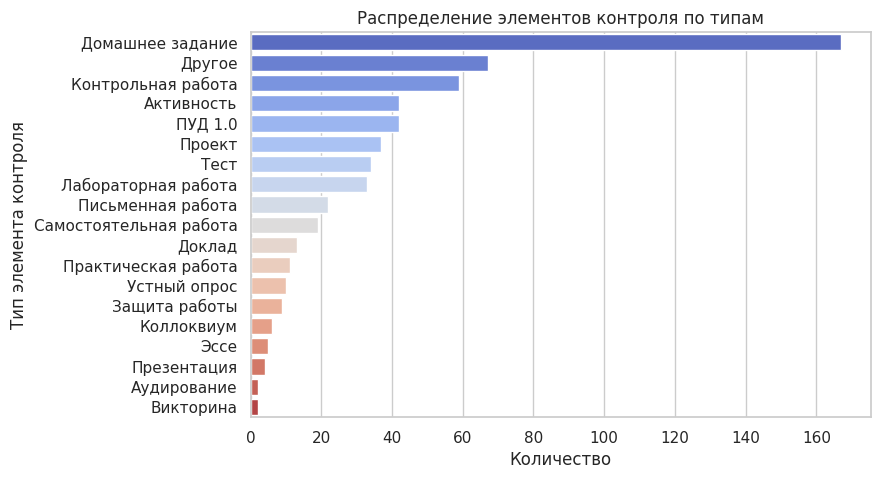

In [ ]:
# 2. Распределение элементов контроля по типам
plt.figure(figsize=(8, 5))
sns.countplot(y=df_unique["Тип"], palette="coolwarm", order=df_unique["Тип"].value_counts().index)
plt.title("Распределение элементов контроля по типам")
plt.xlabel("Количество")
plt.ylabel("Тип элемента контроля")
plt.show()

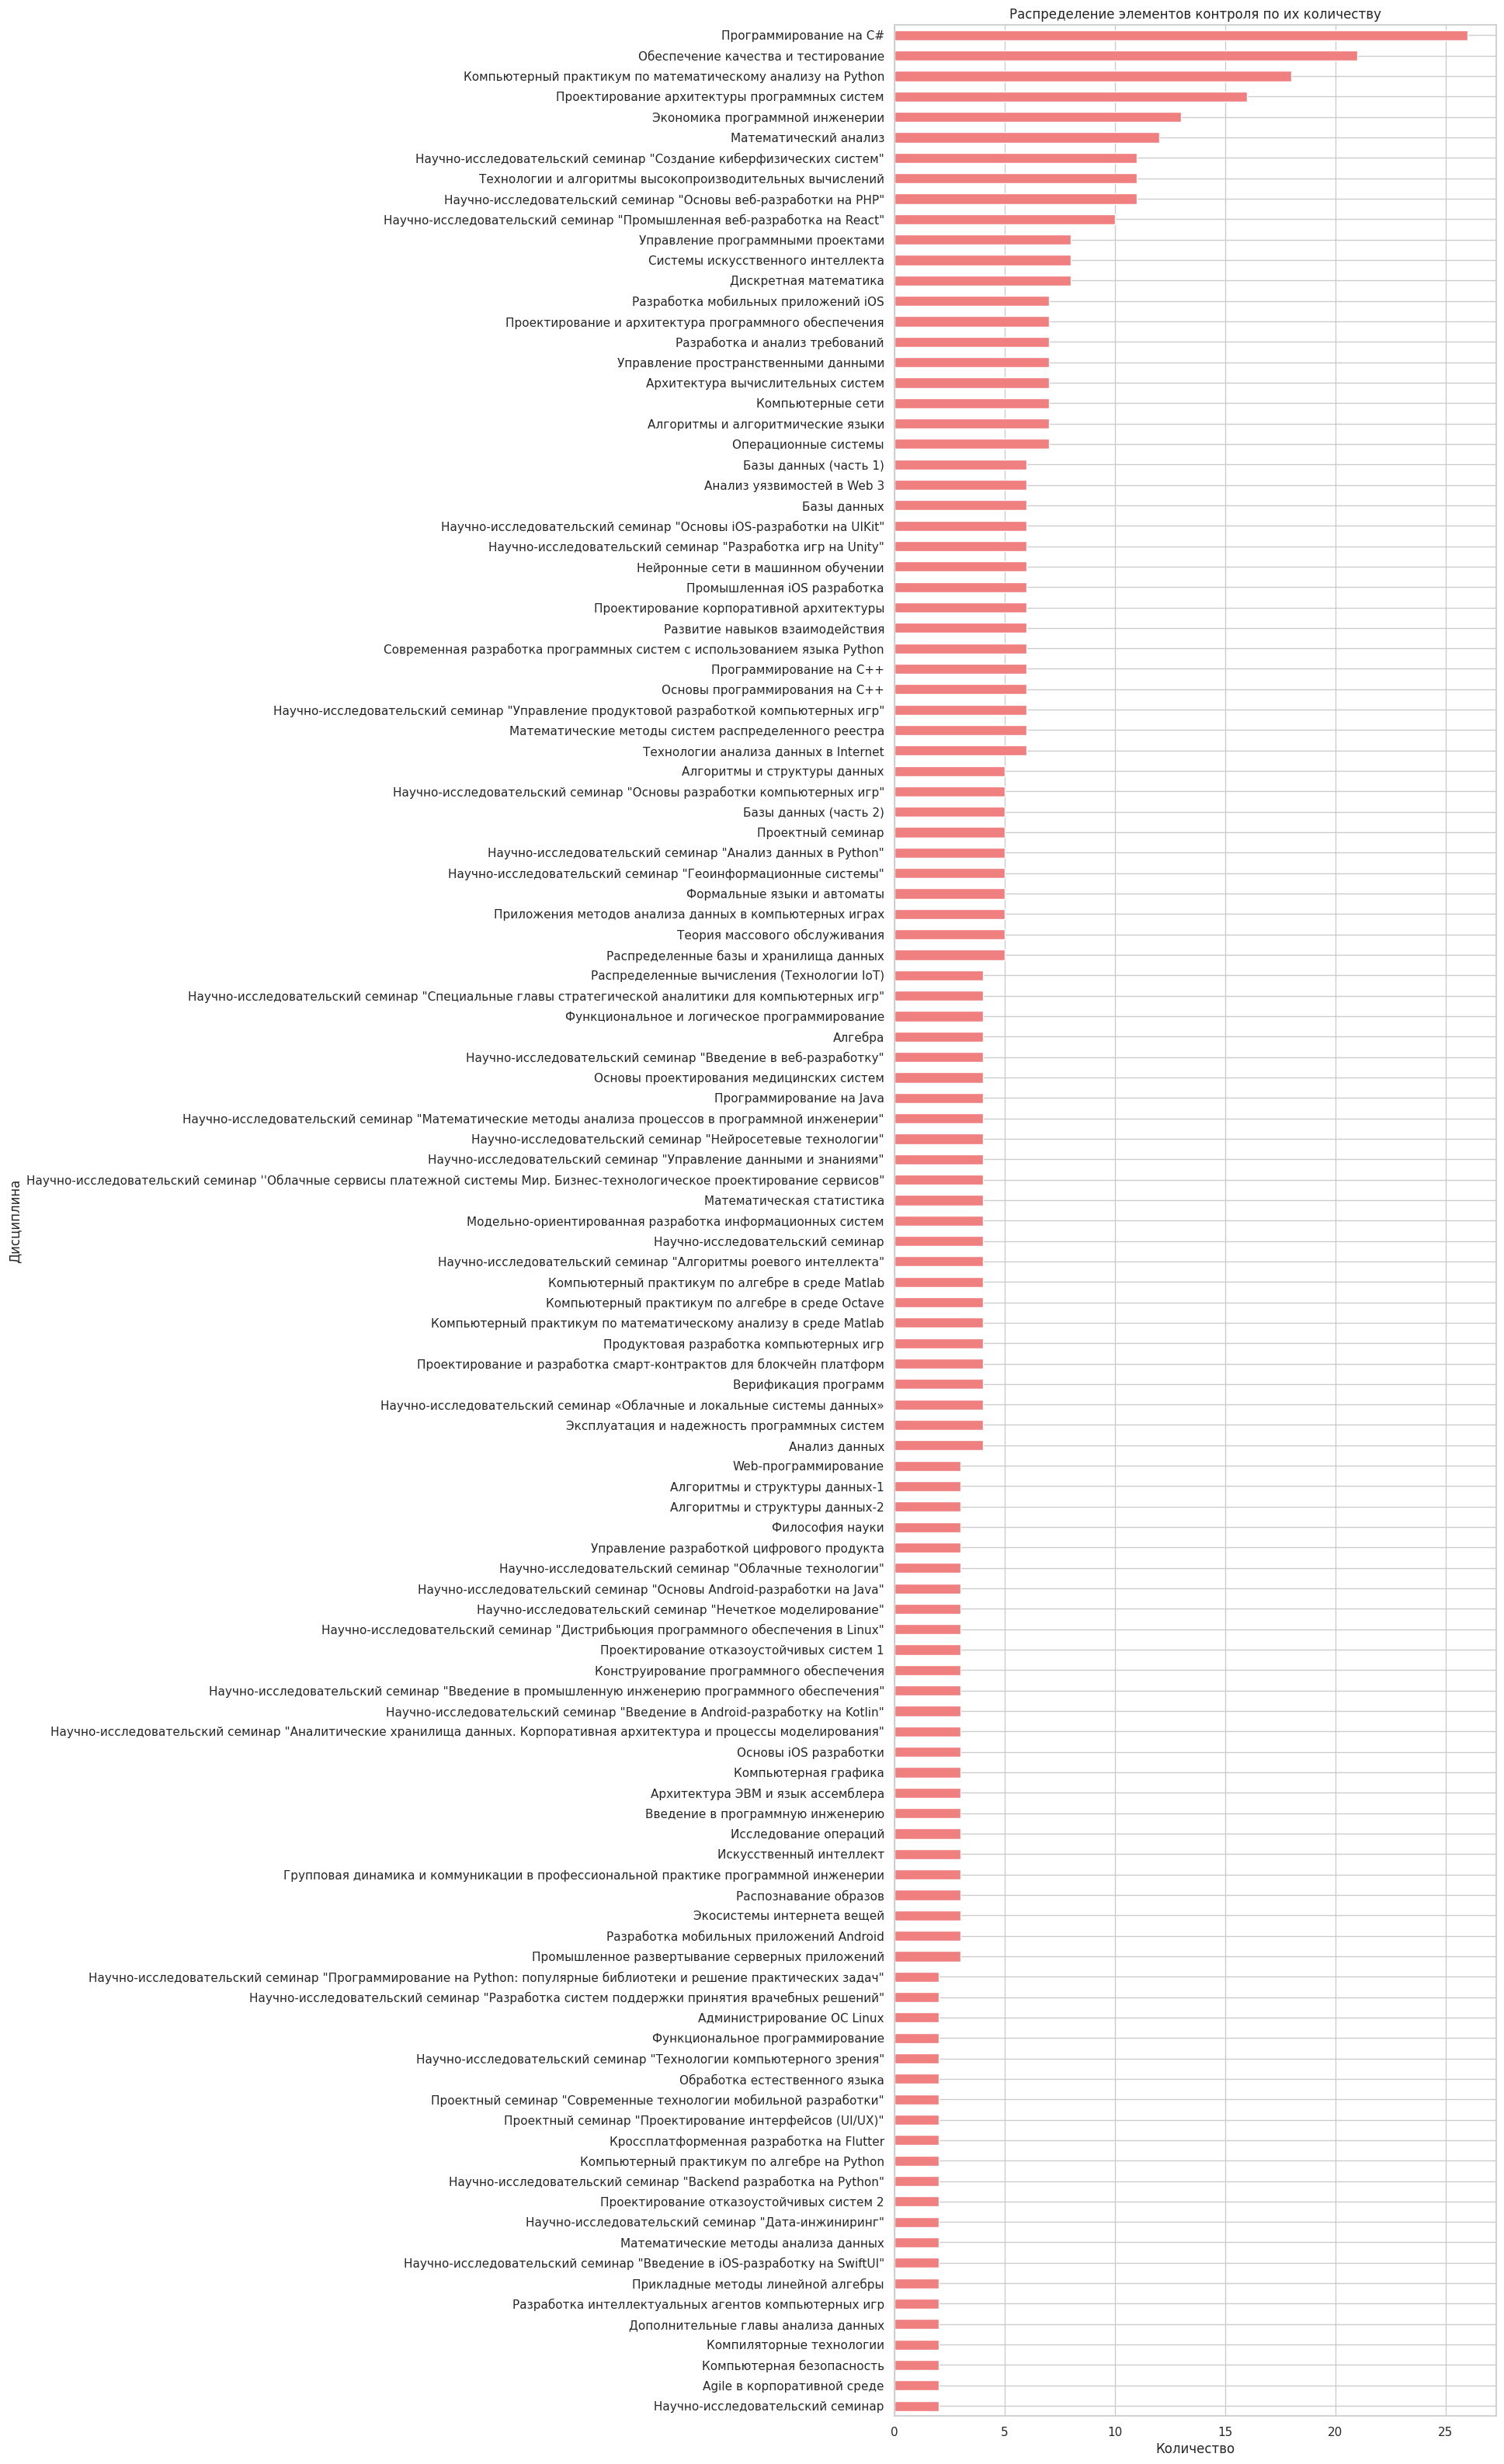

In [ ]:
# 3. Элементы контроля по дисциплинам
plt.figure(figsize=(10, 40))
discipline_counts = df_unique.groupby("Название дисциплины")["Название"].count().sort_values(ascending=False)
discipline_counts.plot(kind="barh", color="lightcoral")
plt.title("Распределение элементов контроля по их количеству")
plt.xlabel("Количество")
plt.ylabel("Дисциплина")
plt.gca().invert_yaxis()
plt.show()

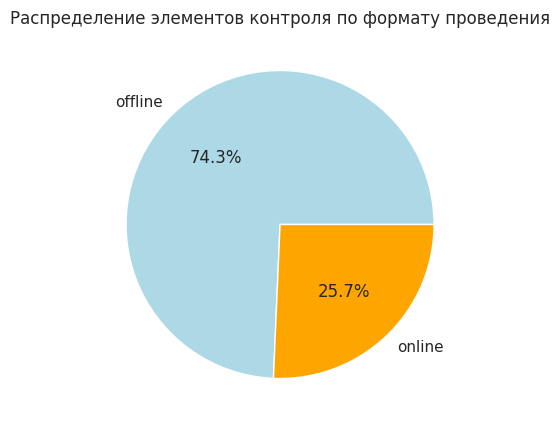

In [ ]:
# 4. Формат проведения (offline, online и т. д.)
plt.figure(figsize=(6, 5))
format_counts = df_unique["Формат проведения"].value_counts()
format_counts.plot(kind="pie", autopct='%1.1f%%', colors=["lightblue", "orange", "green"])
plt.title("Распределение элементов контроля по формату проведения")
plt.ylabel("")
plt.show()

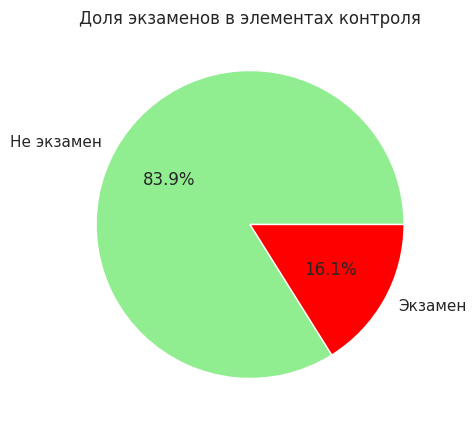

In [ ]:
# 5. Доля экзаменов vs. неэкзаменов
plt.figure(figsize=(5, 5))
exam_counts = df_unique["Является экзаменом"].value_counts()
exam_labels = ["Не экзамен", "Экзамен"]
plt.pie(exam_counts, labels=exam_labels, autopct='%1.1f%%', colors=["lightgreen", "red"])
plt.title("Доля экзаменов в элементах контроля")
plt.show()

<ipython-input-85-8e091dffd29a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_unique["Тип блокирования"], palette="viridis", order=df_unique["Тип блокирования"].value_counts().index)


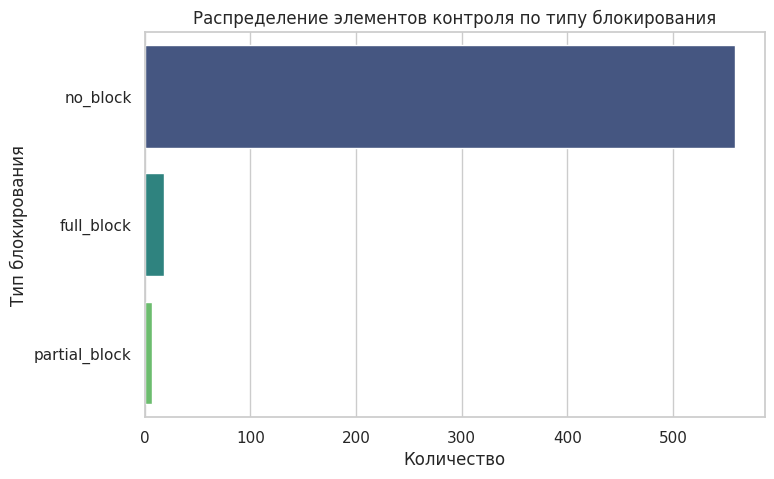

In [ ]:
# 6. Тип блокирования
plt.figure(figsize=(8, 5))
sns.countplot(y=df_unique["Тип блокирования"], palette="viridis", order=df_unique["Тип блокирования"].value_counts().index)
plt.title("Распределение элементов контроля по типу блокирования")
plt.xlabel("Количество")
plt.ylabel("Тип блокирования")
plt.show()

In [ ]:
df_key_words = pd.read_excel('/content/drive/MyDrive/diploma/Ключевые_слова.xlsx')

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

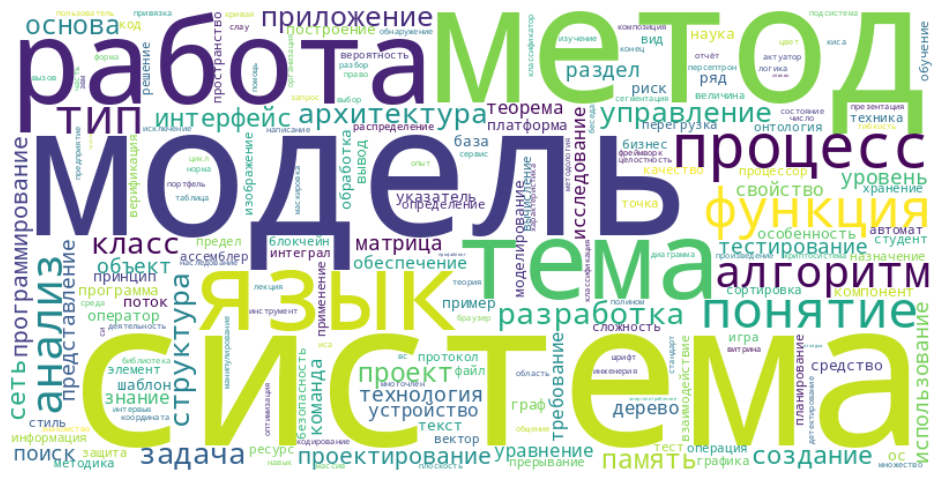

In [ ]:
keywords_by_op = df_key_words.groupby("ОП")["Ключевые слова"].apply(lambda x: ", ".join(x)).reset_index()

# Объединяем все ключевые слова в один список
all_keywords = ", ".join(keywords_by_op["Ключевые слова"]).split(", ")

# Подсчитываем частоту встречаемости
keyword_counts = Counter(all_keywords)

# Создаем и отображаем облако тегов
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(keyword_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df_svod_table = pd.read_excel('/content/drive/MyDrive/diploma/Сводная_таблица_ОП.xlsx')

In [ ]:
morph = MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

# Функция для предобработки текста
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df_simularity = df_svod_table.copy()

df_simularity['processed_text'] = df_simularity['Текст результата'].apply(preprocess_text)

df_simularity

,ОП,Название дисциплины,Текст результата,Название раздела,Описание раздела,processed_text
0,Программная инженерия,Agile в корпоративной среде,В конце вы должны быть в состоянии Описать что...,1) Развитие цифровых технологий благодаря гибк...,Развитие в цифровых технологиях\nSAFe как бази...,конец должный состояние описать необходимо раз...
1,Программная инженерия,UX-исследования для создания новых цифровых пр...,Уметь составлять план и организовывать юзабили...,Выводы и рекомендации по итогам тестирования. ...,-. -. -. -. -. -. -. -. -. -. -. -. -. -. -,уметь составлять план организовывать юзабилить...
2,Программная инженерия,Web-программирование,Умеет выполнять верстку страниц Умеет использо...,Раздел 1. Верстка web-страниц. Раздел 2. Прогр...,Тема 1. Основные элементы web-систем\nОсновные...,уметь выполнять вёрстка страница уметь использ...
3,Программная инженерия,Академическое письмо на английском языке,Владеет принципами организации информации при ...,Заключение. Аннотация. Введение. Методология....,Структура раздела. Принципы организации информ...,владеть принцип организация информация описани...
4,Программная инженерия,Алгебра,Умение вычислять определители матриц в том чис...,"Билинейные и квадратичные функции, евклидовы п...",25.\tБилинейные формы. Формула для преобразова...,умение вычислять определитель матрица число ис...
...,...,...,...,...,...,...
123,Программная инженерия,Финтех тренды,Узнать базовые понятия технологий финтеха Узна...,1.Введение. 10. Цифровой рубль. 2.Большие данн...,Вводная лекция. Цифровой рубль. Большие данные...,узнать базовый понятие технология финтех узнат...
124,Программная инженерия,Формальные языки и трансляции,Знать задачи принципы методы и подходы теории ...,Автомат с магазинной памятью. Детерминированны...,Незамкнутость КС-языков относительно пересечен...,знать задача принцип метод подход теория форма...
125,Программная инженерия,Функциональное программирование,Знает понятия и теоретические основы лямбда ис...,Раздел 1. Основы функционального программирова...,Тема 1. Введение: функциональное и императивно...,знать понятие теоретический основа лямбда исчи...
126,Программная инженерия,Хранилища данных и BI,владеет технологиями сбора хранения и обработк...,Введение в аналитику данных. Визуализация в BI...,Термин «анализ данных». Задачи прикладной мате...,владеть технология сбор хранение обработка инф...


<ipython-input-92-2794ad049510>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_unique["Название"], palette="coolwarm", order=df_unique["Название"].value_counts().index)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


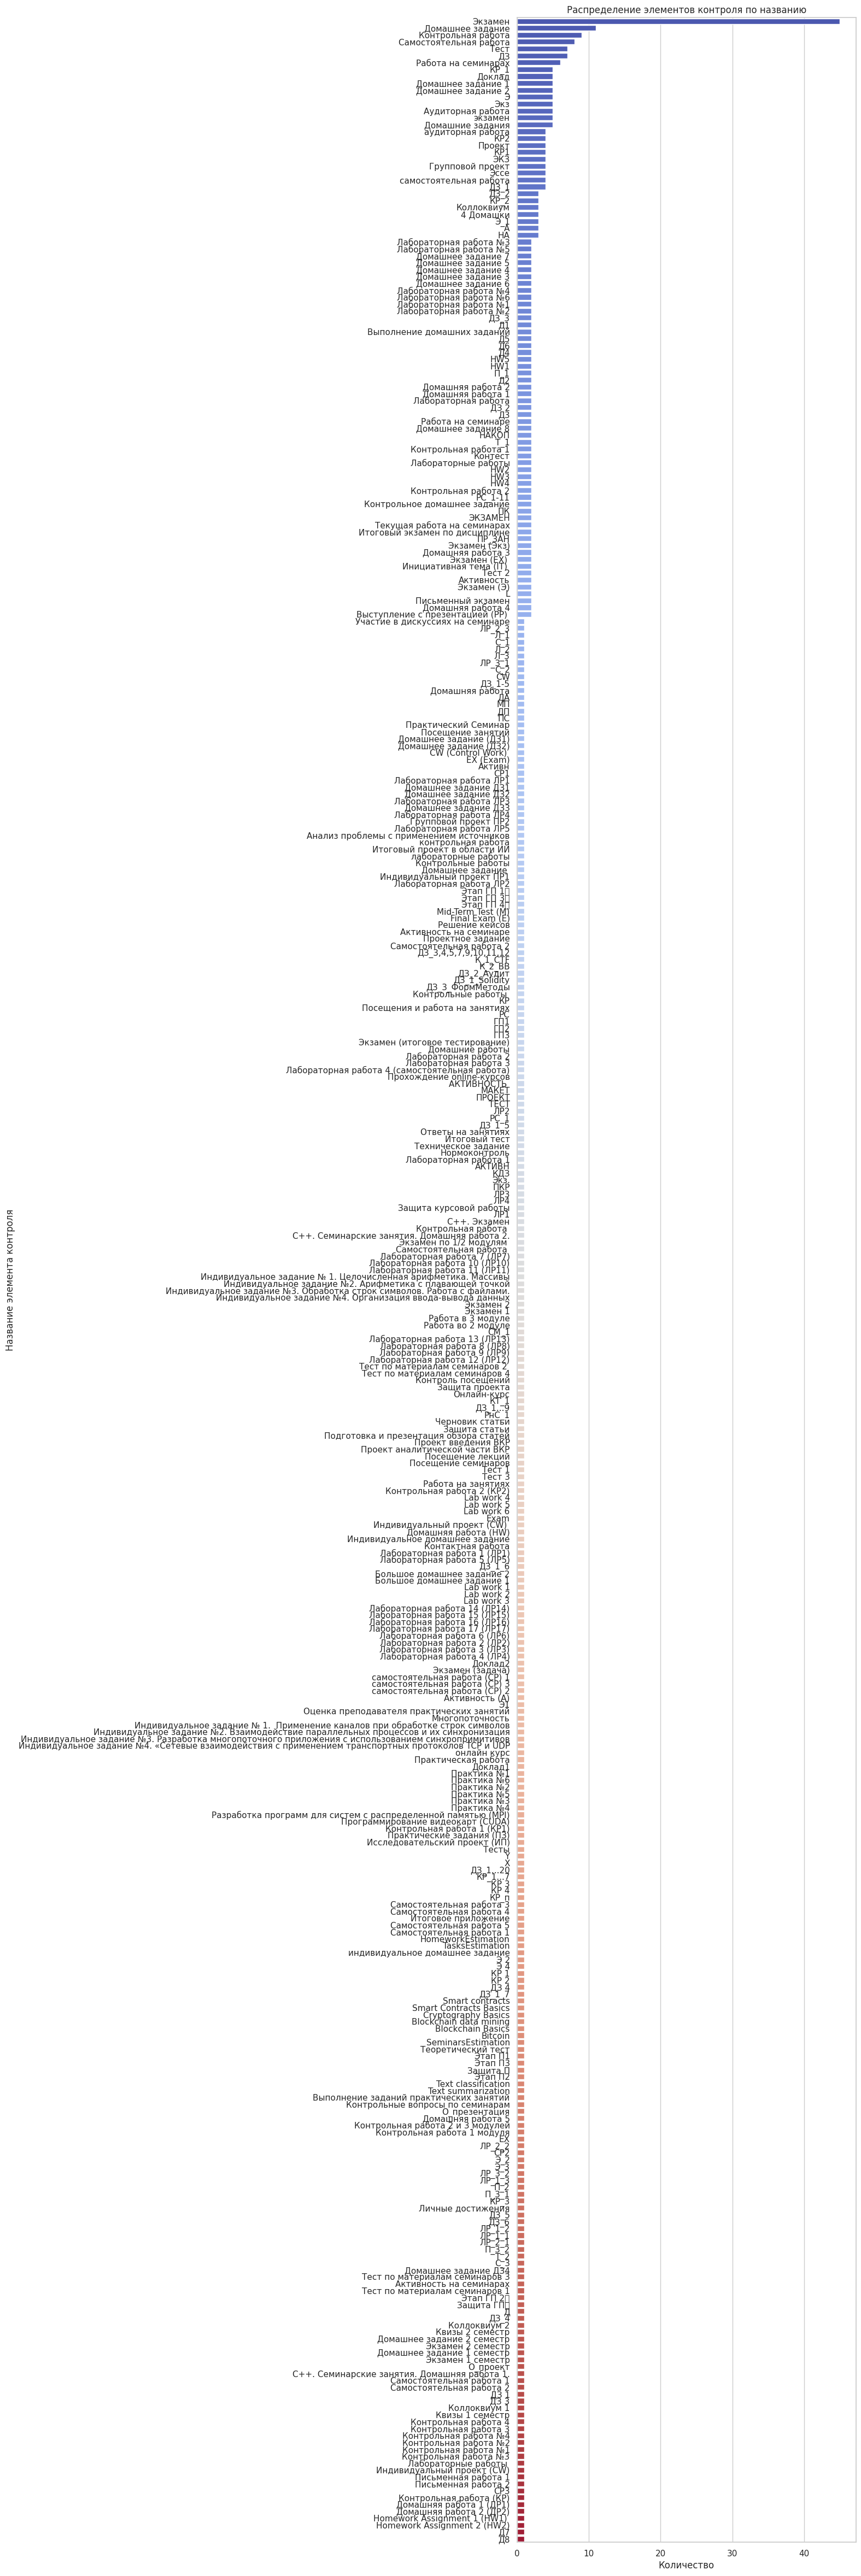

In [ ]:
plt.figure(figsize=(8, 60))
sns.countplot(y=df_unique["Название"], palette="coolwarm", order=df_unique["Название"].value_counts().index)
plt.title("Распределение элементов контроля по названию")
plt.xlabel("Количество")
plt.ylabel("Название элемента контроля")
plt.show()